# Exploring when Jupyter notebooks are an appropriate tool to use

## Advantages of Notebooks

Notebooks are great when you want to teach someone how to use a package and the results it produces.\
For example, let's say you want to show someone how to plot a sinusoidal signal using `numpy` and `matplotlib`.

**Step 1:** Import necessary modules.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

**Step 2:** Create the arrays you want to plot, let's say following the equation: $y = sin(2\pi x)$

In [75]:
xvals = np.arange(0, 6, 0.02)
yvals = np.sin(xvals*2*np.pi)

**Step 3**: Plot the arrays.

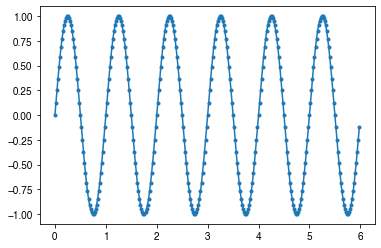

In [76]:
plt.plot(xvals, yvals,'.-');

Done!\
That's great, right? Well, now let's look at some things that are more challenging with Notebooks and the reasons we rarely use Notebooks in our lab.

## Disanvantages of Notebooks

### Notebooks require running additional software

* Running a notebook requires that you have installed `jupyter-notebook` (or an IDE that can work with notebooks).
* You need to run notebooks inside a browser (instead of just running a script on the terminal).

### It's hard to import code from one notebook to another

Let's say we need to create a function to be reused in multiple places.

In [77]:
def squiggle(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.01)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

We can use it in this notebook just fine:

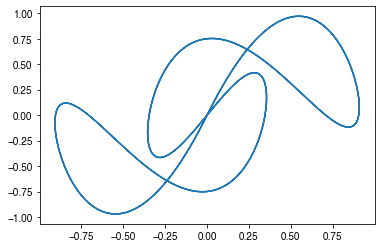

In [78]:
x, y = squiggle(2, 3, 4, 5)
plt.plot(x,y);

But how would you use this same function in another Notebook?\
Ways to do this require installing additional packages, and the process is not ideal.

**Alternative solution**: we can create a Python file (e.g., `funkyplots.py`) containing this function. Then we can import it from our scripts or notebooks with code like:

```python
import funkyplots
x, y = funkyplots.squiggle(2, 3, 4, 5)
```

### Notebooks do not play well with git (version control)

It's very important to use a version control system (like *git*) when we develop software. There are a few reasons why notebooks are not easy to maintain in a version control system:
* Notebooks are stored as JSON files, and things like the "id" for each cell may change, even if the code does not. So when you use version control to see changes between versions, it is **difficult to see the relevant pieces of relevant that changed**.
* Because images are saved as part of the notebook, **files can get really big!** This is ok for notebooks that teach how to use a module, but it's not good for a module that we want to copy to all computers in the lab and update often.

### Notebooks are harder to debug
Let's say we have the following code:

In [3]:
def weirdfun(mylist):
    newlist = mylist
    for ind in range(len(newlist)):
        newlist[ind] = newlist[ind]+2
    return newlist

In [5]:
list1 = [0, 0]
list2 = weirdfun(list1)
print(f'list1: {list1}')
print(f'list2: {list2}')

list1: [2, 2]
list2: [2, 2]


...and we are confused by why `list1` is not `[0, 0]` as we originally defined 🤔

A way to debug the code above would be to use the Python debugger (`pdb`) to stop in the middle of running the function and see what is going with each variable as each line runs.\
This is not easy to achieve in a notebook.

Similarly, there are other features of IDEs (Integrated Development Environments) such as code styling or GitHub copilot that are not easily accessible from notebooks.

### The non-linear workflow of notebooks can make errors harder to detect

A basic example of this would be when a given variable is defined in multiple places.

Let's say `myvar` was defined somewhere in the middle of some code...

In [86]:
# Lots of code
pos = []
nxvals = nyvals = 3
for indx in range(nxvals):
    for indy in range(nyvals):
        myvar = indx
        pos += [indx, indy, myvar]

...and then you have some code that sets the value of that variable:

In [82]:
# More code
myvar = 99

Now let's print the value of `myvar`

In [85]:
print(myvar)

2


The value of this variable may not be what you expect from the last lines of code. This will depend on which cells you run before the line that prints `myvar`, since you can run cells in any order you want.\
While one of the advantages of notebooks is that you don't have to run all your code every time, this can lead to unexpected bugs that may be hard to detect.

## Conclusion

While Jupyter notebooks are very good for teaching how to use a module, whenever you need to write complex modular code that will be shared with others for reuse, you should write proper Python (`.py`) files containing modules and scripts.